# Trading Strategies powered by Machine Learning - Regression

## Linear Regression with scikit-learn - a simple Introduction

In [62]:
import sys
sys.path.append('../../')

In [63]:
from util.load_data import *
from config.constants import *

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

__Linear Relationship between Budget and Revenue__:

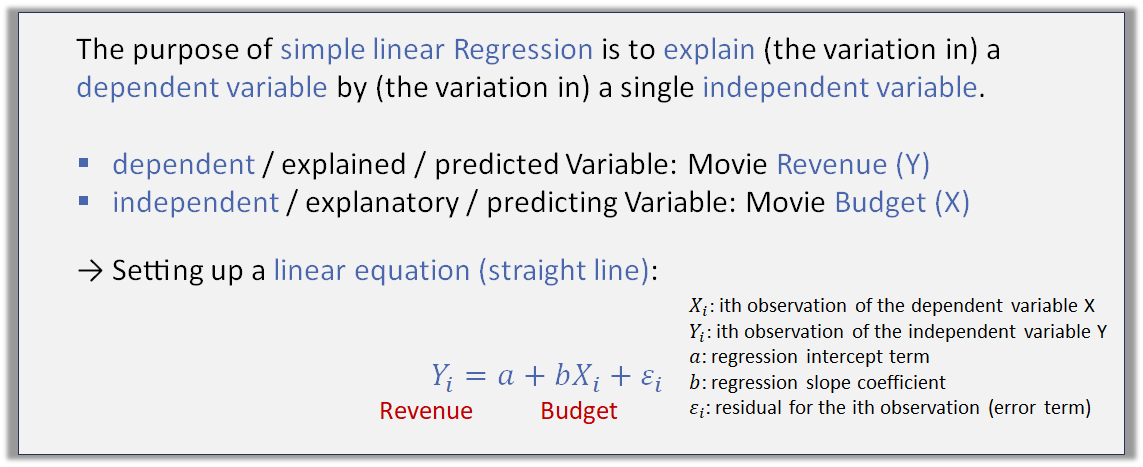

In [65]:
XAUUSD = load_data()

In [66]:
XAUUSD['H4'].Close

Time
2007-01-01 00:00:00     635.497
2007-01-01 04:00:00     635.699
2007-01-01 08:00:00     635.993
2007-01-01 12:00:00     636.006
2007-01-01 16:00:00     635.989
                         ...   
2023-03-10 00:00:00    1829.085
2023-03-10 04:00:00    1833.405
2023-03-10 08:00:00    1834.865
2023-03-10 12:00:00    1862.975
2023-03-10 16:00:00    1864.098
Name: Close, Length: 25976, dtype: float64

In [67]:
XAUUSD['H4'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25976 entries, 2007-01-01 00:00:00 to 2023-03-10 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    25976 non-null  float64
 1   High    25976 non-null  float64
 2   Low     25976 non-null  float64
 3   Close   25976 non-null  float64
 4   Volume  25976 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.2 MB


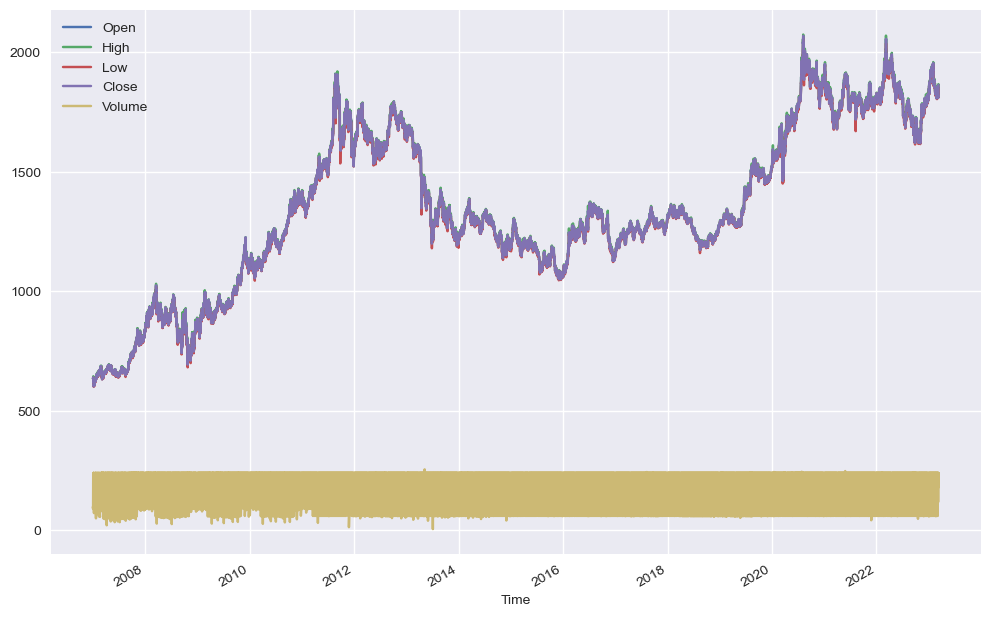

In [68]:
XAUUSD['H4'].plot(figsize = (12, 8))
plt.show()

In [69]:
XAUUSD['H4']["returns"] = np.log(
    XAUUSD['H4']['Close'].div(XAUUSD['H4']['Close'].shift(1)))

In [70]:
XAUUSD['H4']

,Open,High,Low,Close,Volume,returns
Time,,,,,,
2007-01-01 00:00:00,635.679,636.194,635.009,635.497,95,NaN
2007-01-01 04:00:00,635.336,636.220,635.254,635.699,97,0.000318
2007-01-01 08:00:00,635.780,636.225,635.201,635.993,99,0.000462
2007-01-01 12:00:00,636.053,636.189,635.117,636.006,90,0.000020
2007-01-01 16:00:00,635.902,636.185,635.006,635.989,96,-0.000027
...,...,...,...,...,...,...
2023-03-10 00:00:00,1831.428,1834.765,1827.974,1829.085,240,-0.001273
2023-03-10 04:00:00,1829.085,1834.575,1827.675,1833.405,240,0.002359
2023-03-10 08:00:00,1833.415,1837.245,1830.778,1834.865,240,0.000796


## A simple Linear Model to predict Financial Returns (Part 1)

Correct: Predicting __Returns__ <br>
Wrong: Predicting __Prices__

In [71]:
XAUUSD['H4']["lag1"] = XAUUSD['H4'].returns.shift(1)

In [72]:
XAUUSD['H4'].dropna(inplace=True)

In [73]:
XAUUSD['H4']

,Open,High,Low,Close,Volume,returns,lag1
Time,,,,,,,
2007-01-01 08:00:00,635.780,636.225,635.201,635.993,99,0.000462,0.000318
2007-01-01 12:00:00,636.053,636.189,635.117,636.006,90,0.000020,0.000462
2007-01-01 16:00:00,635.902,636.185,635.006,635.989,96,-0.000027,0.000020
2007-01-01 20:00:00,635.891,637.103,635.122,635.943,127,-0.000072,-0.000027
2007-01-02 00:00:00,635.791,637.364,635.286,637.319,222,0.002161,-0.000072
...,...,...,...,...,...,...,...
2023-03-10 00:00:00,1831.428,1834.765,1827.974,1829.085,240,-0.001273,0.000502
2023-03-10 04:00:00,1829.085,1834.575,1827.675,1833.405,240,0.002359,-0.001273
2023-03-10 08:00:00,1833.415,1837.245,1830.778,1834.865,240,0.000796,0.002359


In [74]:
XAUUSD['H4'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25974 entries, 2007-01-01 08:00:00 to 2023-03-10 16:00:00
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     25974 non-null  float64
 1   High     25974 non-null  float64
 2   Low      25974 non-null  float64
 3   Close    25974 non-null  float64
 4   Volume   25974 non-null  int64  
 5   returns  25974 non-null  float64
 6   lag1     25974 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.6 MB


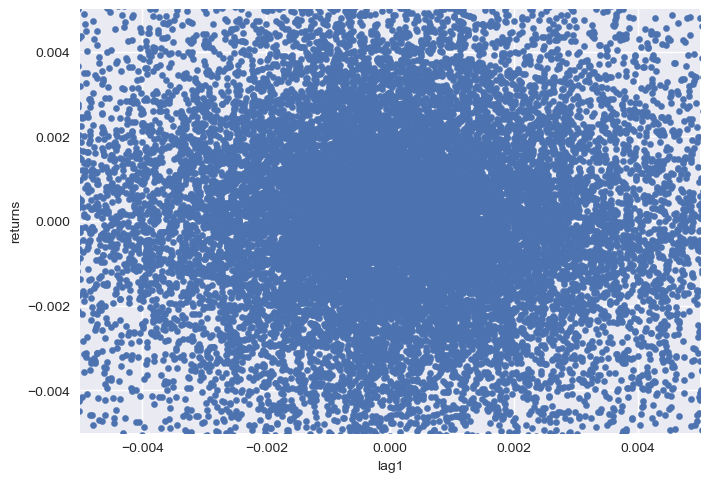

In [75]:
XAUUSD['H4'].iloc[:, -2:].plot(kind="scatter", x="lag1", y="returns")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.show()

## A simple Linear Model to predict Financial Returns (Part 2)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lm = LinearRegression(fit_intercept = True)

In [78]:
lm.fit(XAUUSD['H4'].lag1.to_frame(), XAUUSD['H4'].returns)

LinearRegression()

In [79]:
slope = lm.coef_
slope

array([-0.0030386])

In [80]:
intercept = lm.intercept_
intercept

4.1544447190428684e-05

In [81]:
XAUUSD['H4']["pred"] = lm.predict(XAUUSD['H4'].lag1.to_frame())

In [82]:
XAUUSD['H4']

,Open,High,Low,Close,Volume,returns,lag1,pred
Time,,,,,,,,
2007-01-01 08:00:00,635.780,636.225,635.201,635.993,99,0.000462,0.000318,0.000041
2007-01-01 12:00:00,636.053,636.189,635.117,636.006,90,0.000020,0.000462,0.000040
2007-01-01 16:00:00,635.902,636.185,635.006,635.989,96,-0.000027,0.000020,0.000041
2007-01-01 20:00:00,635.891,637.103,635.122,635.943,127,-0.000072,-0.000027,0.000042
2007-01-02 00:00:00,635.791,637.364,635.286,637.319,222,0.002161,-0.000072,0.000042
...,...,...,...,...,...,...,...,...
2023-03-10 00:00:00,1831.428,1834.765,1827.974,1829.085,240,-0.001273,0.000502,0.000040
2023-03-10 04:00:00,1829.085,1834.575,1827.675,1833.405,240,0.002359,-0.001273,0.000045
2023-03-10 08:00:00,1833.415,1837.245,1830.778,1834.865,240,0.000796,0.002359,0.000034


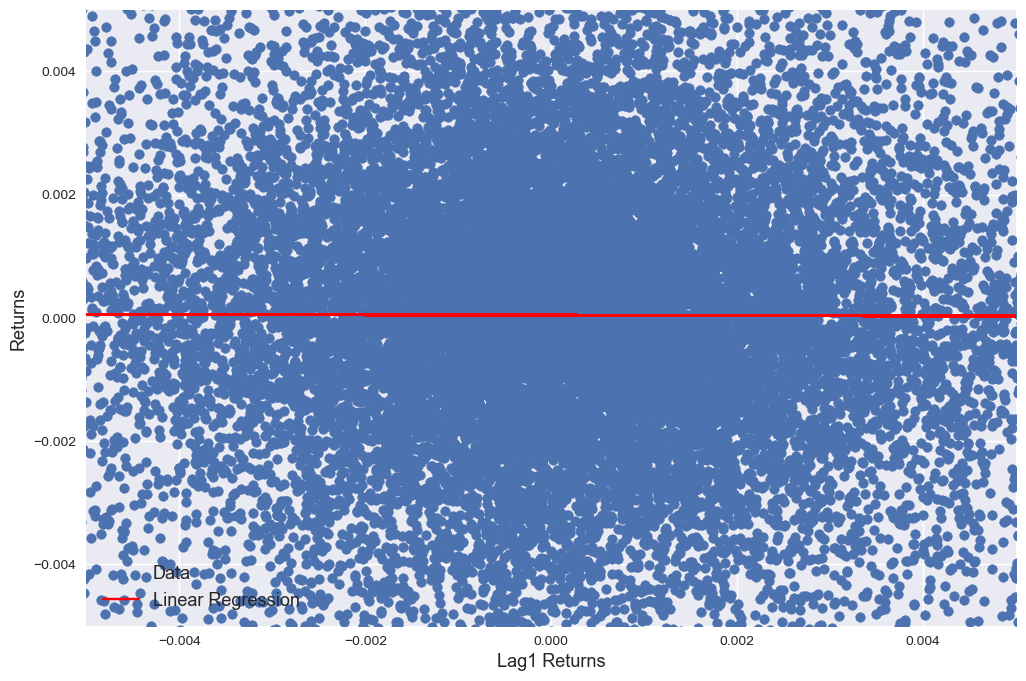

In [83]:
plt.figure(figsize = (12, 8))
plt.scatter(x=XAUUSD['H4'].lag1, y=XAUUSD['H4'].returns, label="Data")
plt.plot(XAUUSD['H4'].lag1, XAUUSD['H4'].pred,
         c="red", label="Linear Regression")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.legend(fontsize = 13)
plt.xlabel("Lag1 Returns", fontsize = 13)
plt.ylabel("Returns", fontsize = 13)
plt.show()

In [84]:
XAUUSD['H4']

,Open,High,Low,Close,Volume,returns,lag1,pred
Time,,,,,,,,
2007-01-01 08:00:00,635.780,636.225,635.201,635.993,99,0.000462,0.000318,0.000041
2007-01-01 12:00:00,636.053,636.189,635.117,636.006,90,0.000020,0.000462,0.000040
2007-01-01 16:00:00,635.902,636.185,635.006,635.989,96,-0.000027,0.000020,0.000041
2007-01-01 20:00:00,635.891,637.103,635.122,635.943,127,-0.000072,-0.000027,0.000042
2007-01-02 00:00:00,635.791,637.364,635.286,637.319,222,0.002161,-0.000072,0.000042
...,...,...,...,...,...,...,...,...
2023-03-10 00:00:00,1831.428,1834.765,1827.974,1829.085,240,-0.001273,0.000502,0.000040
2023-03-10 04:00:00,1829.085,1834.575,1827.675,1833.405,240,0.002359,-0.001273,0.000045
2023-03-10 08:00:00,1833.415,1837.245,1830.778,1834.865,240,0.000796,0.002359,0.000034


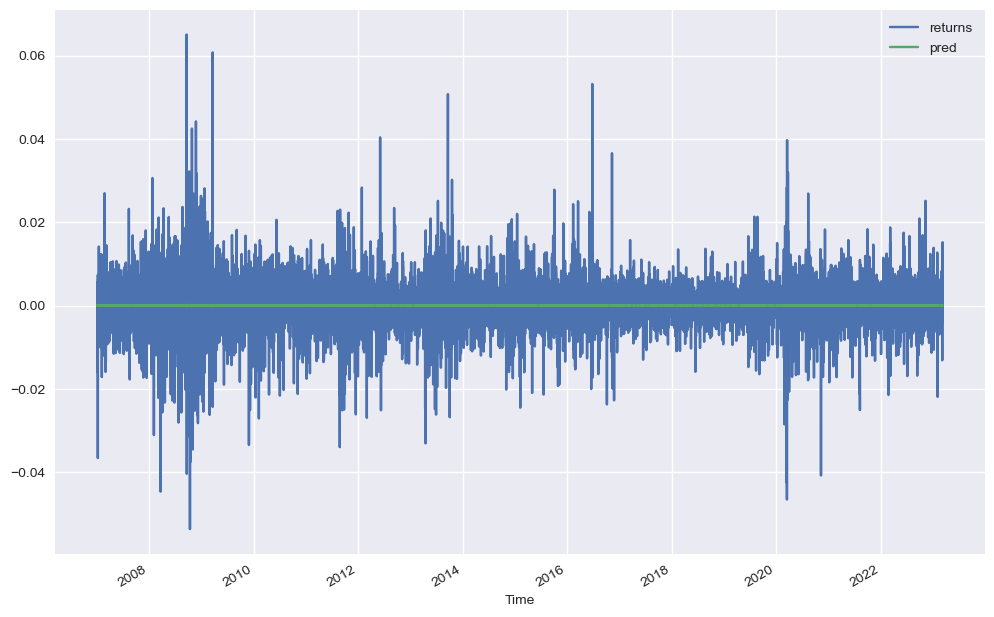

In [85]:
XAUUSD['H4'][["returns", "pred"]].plot(figsize=(12, 8))
plt.show() # model fails to predict the magnitude of returns

In [86]:
# maybe the model can predict the market direction (-1 / +1)
XAUUSD['H4'].pred = np.sign(XAUUSD['H4'].pred)

In [87]:
XAUUSD['H4']

,Open,High,Low,Close,Volume,returns,lag1,pred
Time,,,,,,,,
2007-01-01 08:00:00,635.780,636.225,635.201,635.993,99,0.000462,0.000318,1.0
2007-01-01 12:00:00,636.053,636.189,635.117,636.006,90,0.000020,0.000462,1.0
2007-01-01 16:00:00,635.902,636.185,635.006,635.989,96,-0.000027,0.000020,1.0
2007-01-01 20:00:00,635.891,637.103,635.122,635.943,127,-0.000072,-0.000027,1.0
2007-01-02 00:00:00,635.791,637.364,635.286,637.319,222,0.002161,-0.000072,1.0
...,...,...,...,...,...,...,...,...
2023-03-10 00:00:00,1831.428,1834.765,1827.974,1829.085,240,-0.001273,0.000502,1.0
2023-03-10 04:00:00,1829.085,1834.575,1827.675,1833.405,240,0.002359,-0.001273,1.0
2023-03-10 08:00:00,1833.415,1837.245,1830.778,1834.865,240,0.000796,0.002359,1.0


In [88]:
np.sign(XAUUSD['H4'].returns * XAUUSD['H4'].pred)

Time
2007-01-01 08:00:00    1.0
2007-01-01 12:00:00    1.0
2007-01-01 16:00:00   -1.0
2007-01-01 20:00:00   -1.0
2007-01-02 00:00:00    1.0
                      ... 
2023-03-10 00:00:00   -1.0
2023-03-10 04:00:00    1.0
2023-03-10 08:00:00    1.0
2023-03-10 12:00:00    1.0
2023-03-10 16:00:00   -1.0
Length: 25974, dtype: float64

In [89]:
hits = np.sign(XAUUSD['H4'].returns * XAUUSD['H4'].pred).value_counts()

In [90]:
hits

 1.0    13181
-1.0    12781
 0.0       12
dtype: int64

In [91]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio # percentage of correctly forecasted market directions 

0.5074690074690075

## A Multiple Regression Model to predict Financial Returns

__Adding more Features - a multiple Regression Model__

In [92]:
XAUUSD = load_data()

In [93]:
data = XAUUSD['H4'].loc['2007':'2020'].copy()

In [94]:
data

,Open,High,Low,Close,Volume
Time,,,,,
2007-01-01 00:00:00,635.679,636.194,635.009,635.497,95
2007-01-01 04:00:00,635.336,636.220,635.254,635.699,97
2007-01-01 08:00:00,635.780,636.225,635.201,635.993,99
2007-01-01 12:00:00,636.053,636.189,635.117,636.006,90
2007-01-01 16:00:00,635.902,636.185,635.006,635.989,96
...,...,...,...,...,...
2020-12-31 04:00:00,1888.898,1894.168,1885.308,1892.494,240
2020-12-31 08:00:00,1892.504,1895.938,1890.295,1893.908,240
2020-12-31 12:00:00,1893.908,1900.205,1891.658,1898.694,240


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22475 entries, 2007-01-01 00:00:00 to 2020-12-31 20:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    22475 non-null  float64
 1   High    22475 non-null  float64
 2   Low     22475 non-null  float64
 3   Close   22475 non-null  float64
 4   Volume  22475 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.0 MB


In [96]:
data.dropna(inplace = True)

In [97]:
data["returns"] = np.log(data['Close'].div(data['Close'].shift(1)))

In [98]:
lags = 5

In [99]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [100]:
data

,Open,High,Low,Close,Volume,returns,lag1,lag2,lag3,lag4,lag5
Time,,,,,,,,,,,
2007-01-02 00:00:00,635.791,637.364,635.286,637.319,222,0.002161,-0.000072,-0.000027,0.000020,0.000462,0.000318
2007-01-02 04:00:00,637.287,638.877,635.991,638.601,222,0.002010,0.002161,-0.000072,-0.000027,0.000020,0.000462
2007-01-02 08:00:00,638.689,640.802,636.984,639.248,235,0.001013,0.002010,0.002161,-0.000072,-0.000027,0.000020
2007-01-02 12:00:00,639.261,640.509,637.925,639.715,235,0.000730,0.001013,0.002010,0.002161,-0.000072,-0.000027
2007-01-02 16:00:00,640.011,640.698,638.710,639.412,213,-0.000474,0.000730,0.001013,0.002010,0.002161,-0.000072
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 04:00:00,1888.898,1894.168,1885.308,1892.494,240,0.001886,-0.003198,0.002797,0.002356,0.003652,-0.000113
2020-12-31 08:00:00,1892.504,1895.938,1890.295,1893.908,240,0.000747,0.001886,-0.003198,0.002797,0.002356,0.003652
2020-12-31 12:00:00,1893.908,1900.205,1891.658,1898.694,240,0.002524,0.000747,0.001886,-0.003198,0.002797,0.002356


In [101]:
cols

['lag1', 'lag2', 'lag3', 'lag4', 'lag5']

In [102]:
lm = LinearRegression(fit_intercept = True)

In [103]:
lm.fit(data[cols], data.returns)

LinearRegression()

In [104]:
lm.coef_

array([-0.00641157, -0.01030046, -0.00763316,  0.02121168,  0.04354512])

In [105]:
lm.intercept_

4.6702022985011546e-05

In [106]:
data["pred"] = lm.predict(data[cols])

In [107]:
data.pred = np.sign(data.pred)

In [108]:
data

,Open,High,Low,Close,Volume,returns,lag1,lag2,lag3,lag4,lag5,pred
Time,,,,,,,,,,,,
2007-01-02 00:00:00,635.791,637.364,635.286,637.319,222,0.002161,-0.000072,-0.000027,0.000020,0.000462,0.000318,1.0
2007-01-02 04:00:00,637.287,638.877,635.991,638.601,222,0.002010,0.002161,-0.000072,-0.000027,0.000020,0.000462,1.0
2007-01-02 08:00:00,638.689,640.802,636.984,639.248,235,0.001013,0.002010,0.002161,-0.000072,-0.000027,0.000020,1.0
2007-01-02 12:00:00,639.261,640.509,637.925,639.715,235,0.000730,0.001013,0.002010,0.002161,-0.000072,-0.000027,1.0
2007-01-02 16:00:00,640.011,640.698,638.710,639.412,213,-0.000474,0.000730,0.001013,0.002010,0.002161,-0.000072,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 04:00:00,1888.898,1894.168,1885.308,1892.494,240,0.001886,-0.003198,0.002797,0.002356,0.003652,-0.000113,1.0
2020-12-31 08:00:00,1892.504,1895.938,1890.295,1893.908,240,0.000747,0.001886,-0.003198,0.002797,0.002356,0.003652,1.0
2020-12-31 12:00:00,1893.908,1900.205,1891.658,1898.694,240,0.002524,0.000747,0.001886,-0.003198,0.002797,0.002356,1.0


In [109]:
data.pred.value_counts()

 1.0    14498
-1.0     7971
Name: pred, dtype: int64

In [110]:
hits = np.sign(data.returns * data.pred).value_counts()

In [111]:
hits

 1.0    11509
-1.0    10950
 0.0       10
dtype: int64

In [112]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5122168320797543

## In-Sample Backtesting and the Look-ahead-bias

In [113]:
data

,Open,High,Low,Close,Volume,returns,lag1,lag2,lag3,lag4,lag5,pred
Time,,,,,,,,,,,,
2007-01-02 00:00:00,635.791,637.364,635.286,637.319,222,0.002161,-0.000072,-0.000027,0.000020,0.000462,0.000318,1.0
2007-01-02 04:00:00,637.287,638.877,635.991,638.601,222,0.002010,0.002161,-0.000072,-0.000027,0.000020,0.000462,1.0
2007-01-02 08:00:00,638.689,640.802,636.984,639.248,235,0.001013,0.002010,0.002161,-0.000072,-0.000027,0.000020,1.0
2007-01-02 12:00:00,639.261,640.509,637.925,639.715,235,0.000730,0.001013,0.002010,0.002161,-0.000072,-0.000027,1.0
2007-01-02 16:00:00,640.011,640.698,638.710,639.412,213,-0.000474,0.000730,0.001013,0.002010,0.002161,-0.000072,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 04:00:00,1888.898,1894.168,1885.308,1892.494,240,0.001886,-0.003198,0.002797,0.002356,0.003652,-0.000113,1.0
2020-12-31 08:00:00,1892.504,1895.938,1890.295,1893.908,240,0.000747,0.001886,-0.003198,0.002797,0.002356,0.003652,1.0
2020-12-31 12:00:00,1893.908,1900.205,1891.658,1898.694,240,0.002524,0.000747,0.001886,-0.003198,0.002797,0.002356,1.0


In [114]:
data["strategy"] = data.pred * data.returns

In [115]:
data["Buy and Hold"] = data["returns"].cumsum().apply(np.exp)
data["ML"] = data["strategy"].cumsum().apply(np.exp)

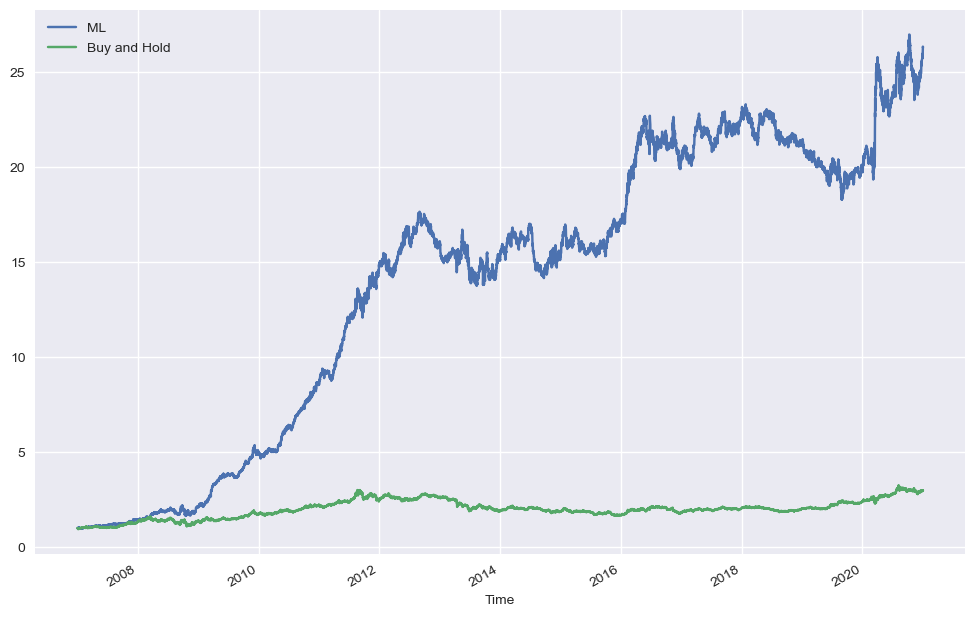

In [116]:
data[["ML","Buy and Hold"]].plot(figsize=(12, 8))
plt.show()

In [117]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [118]:
data.trades.value_counts()

0.0    14450
2.0     8019
Name: trades, dtype: int64

## Out-Sample Forward Testing

In [119]:
data = XAUUSD['H4'].loc['2020':'2023'].copy()

In [120]:
data

,Open,High,Low,Close,Volume
Time,,,,,
2020-01-01 20:00:00,1518.768,1521.068,1518.075,1518.285,60
2020-01-02 00:00:00,1518.305,1521.135,1517.115,1520.275,239
2020-01-02 04:00:00,1520.275,1521.375,1518.938,1519.128,239
2020-01-02 08:00:00,1519.135,1522.365,1518.395,1521.955,240
2020-01-02 12:00:00,1521.955,1531.328,1521.555,1529.108,240
...,...,...,...,...,...
2023-03-10 00:00:00,1831.428,1834.765,1827.974,1829.085,240
2023-03-10 04:00:00,1829.085,1834.575,1827.675,1833.405,240
2023-03-10 08:00:00,1833.415,1837.245,1830.778,1834.865,240


In [121]:
data["returns"] = np.log(data['Close'].div(data['Close'].shift(1)))

In [122]:
data

,Open,High,Low,Close,Volume,returns
Time,,,,,,
2020-01-01 20:00:00,1518.768,1521.068,1518.075,1518.285,60,NaN
2020-01-02 00:00:00,1518.305,1521.135,1517.115,1520.275,239,0.001310
2020-01-02 04:00:00,1520.275,1521.375,1518.938,1519.128,239,-0.000755
2020-01-02 08:00:00,1519.135,1522.365,1518.395,1521.955,240,0.001859
2020-01-02 12:00:00,1521.955,1531.328,1521.555,1529.108,240,0.004689
...,...,...,...,...,...,...
2023-03-10 00:00:00,1831.428,1834.765,1827.974,1829.085,240,-0.001273
2023-03-10 04:00:00,1829.085,1834.575,1827.675,1833.405,240,0.002359
2023-03-10 08:00:00,1833.415,1837.245,1830.778,1834.865,240,0.000796


In [123]:
lags = 5

In [124]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [125]:
data

,Open,High,Low,Close,Volume,returns,lag1,lag2,lag3,lag4,lag5
Time,,,,,,,,,,,
2020-01-02 20:00:00,1526.708,1529.098,1526.448,1528.728,179,0.001322,-0.001571,0.004689,0.001859,-0.000755,0.001310
2020-01-03 00:00:00,1528.728,1540.968,1528.728,1538.548,240,0.006403,0.001322,-0.001571,0.004689,0.001859,-0.000755
2020-01-03 04:00:00,1538.548,1543.918,1537.398,1543.435,240,0.003171,0.006403,0.001322,-0.001571,0.004689,0.001859
2020-01-03 08:00:00,1543.455,1551.445,1543.000,1549.308,240,0.003798,0.003171,0.006403,0.001322,-0.001571,0.004689
2020-01-03 12:00:00,1549.318,1550.988,1540.848,1548.808,240,-0.000323,0.003798,0.003171,0.006403,0.001322,-0.001571
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-10 00:00:00,1831.428,1834.765,1827.974,1829.085,240,-0.001273,0.000502,0.001039,0.005478,0.002178,0.000579
2023-03-10 04:00:00,1829.085,1834.575,1827.675,1833.405,240,0.002359,-0.001273,0.000502,0.001039,0.005478,0.002178
2023-03-10 08:00:00,1833.415,1837.245,1830.778,1834.865,240,0.000796,0.002359,-0.001273,0.000502,0.001039,0.005478


In [126]:
data["pred"] = lm.predict(data[cols])

In [127]:
data

,Open,High,Low,Close,Volume,returns,lag1,lag2,lag3,lag4,lag5,pred
Time,,,,,,,,,,,,
2020-01-02 20:00:00,1526.708,1529.098,1526.448,1528.728,179,0.001322,-0.001571,0.004689,0.001859,-0.000755,0.001310,0.000035
2020-01-03 00:00:00,1528.728,1540.968,1528.728,1538.548,240,0.006403,0.001322,-0.001571,0.004689,0.001859,-0.000755,0.000025
2020-01-03 04:00:00,1538.548,1543.918,1537.398,1543.435,240,0.003171,0.006403,0.001322,-0.001571,0.004689,0.001859,0.000184
2020-01-03 08:00:00,1543.455,1551.445,1543.000,1549.308,240,0.003798,0.003171,0.006403,0.001322,-0.001571,0.004689,0.000121
2020-01-03 12:00:00,1549.318,1550.988,1540.848,1548.808,240,-0.000323,0.003798,0.003171,0.006403,0.001322,-0.001571,-0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-10 00:00:00,1831.428,1834.765,1827.974,1829.085,240,-0.001273,0.000502,0.001039,0.005478,0.002178,0.000579,0.000062
2023-03-10 04:00:00,1829.085,1834.575,1827.675,1833.405,240,0.002359,-0.001273,0.000502,0.001039,0.005478,0.002178,0.000253
2023-03-10 08:00:00,1833.415,1837.245,1830.778,1834.865,240,0.000796,0.002359,-0.001273,0.000502,0.001039,0.005478,0.000301


In [128]:
data.pred = np.sign(data.pred)

In [129]:
data.pred.value_counts()

 1.0    3293
-1.0    1806
Name: pred, dtype: int64

In [130]:
hits = np.sign(data.returns * data.pred).value_counts()

In [131]:
hits

 1.0    2573
-1.0    2524
 0.0       2
dtype: int64

In [132]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5046087468131006

In [133]:
data["strategy"] = data.pred * data.returns

In [138]:
data["Buy and Hold"] = data["returns"].cumsum().apply(np.exp)
data["ML Forward Test"] = data["strategy"].cumsum().apply(np.exp)

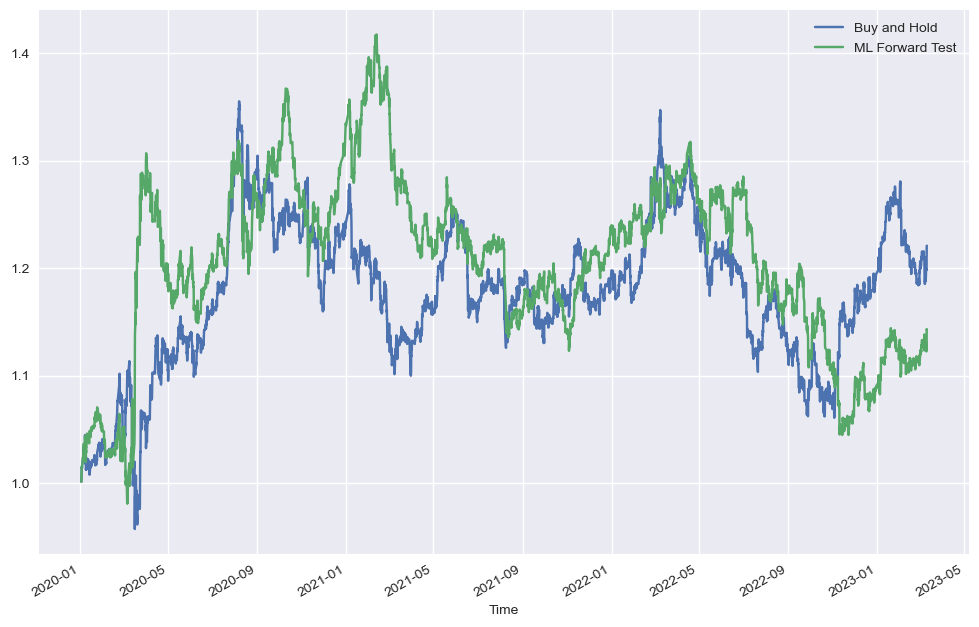

In [139]:
data[["Buy and Hold", "ML Forward Test"]].plot(figsize=(12, 8))
plt.show()

In [136]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [137]:
data.trades.value_counts()

0.0    3300
2.0    1799
Name: trades, dtype: int64